In [1]:
import numpy as np
import matplotlib.pyplot as plt

from squlearn import Executor
from squlearn.encoding_circuit import ChebyshevRx
from squlearn.observables import IsingHamiltonian, SummedPaulis
from squlearn.qnn import QNNRegressor, SquaredLoss
from squlearn.optimizers import Adam, SGLBO

## PQC

C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


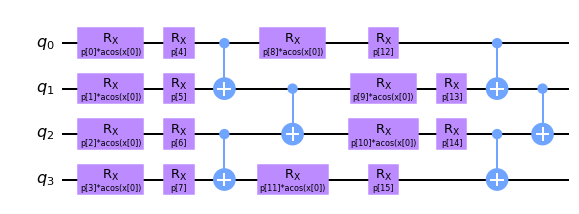

In [2]:
executor = Executor("qasm_simulator")
executor.set_shots(5000)

nqubits = 4
number_of_layers = 2

pqc = ChebyshevRx(nqubits, 1, num_layers=number_of_layers)
pqc.draw("mpl")

## Observable

In [3]:
op = SummedPaulis(nqubits)
print(op)

SparsePauliOp(['IIII', 'IIIZ', 'IIZI', 'IZII', 'ZIII'],
              coeffs=[ParameterExpression(1.0*p[0]), ParameterExpression(1.0*p[1]),
 ParameterExpression(1.0*p[2]), ParameterExpression(1.0*p[3]),
 ParameterExpression(1.0*p[4])])


In [4]:
# Randomly initialize parameters of the encoding circuit
np.random.seed(13)
param_ini =  np.random.rand(pqc.num_parameters)
# Initialize parameters of the observable as ones
param_op_ini = np.random.rand(op.num_parameters)
x0 = [[i * 0.02] for i in range(15)]

In [5]:
# qnn_simulator_adam = QNNRegressor(
#     pqc,
#     op,
#     executor,
#     SquaredLoss(),
#     Adam({"lr": 0.001,"log_file": "adam_logarithmus_noise_new.log", "maxiter": 300}),
#     param_ini,
#     param_op_ini=param_op_ini,
#     opt_param_op=True, 
#     parameter_seed=124
# )

# x_train = np.arange(0.1, 0.9, 0.1)
# y_train = np.log(x_train)

# qnn_simulator_adam.fit(x_train, y_train)

In [6]:
#x0 = [[i * 0.02] for i in range(15)]
x0 = [[1e-6], [2e-6], [3e-6], [4e-6], [5e-6], [6e-6], [7e-6], [8e-6], [9e-6], [1e-5], [2e-5], [3e-5], [4e-5], [5e-5], [6e-5], [7e-5], [8e-5], [9e-5], [1e-4], [2e-4], [3e-4], [4e-4], [5e-4], [6e-4], [7e-4], [8e-4], [9e-4], [1e-3], [2e-3], [3e-3], [4e-3], [5e-3], [6e-3], [7e-3], [8e-3], [9e-3], [1e-2], [2e-2], [3e-2], [4e-2], [5e-2], [6e-2], [7e-2], [8e-2], [9e-2], [1e-1], [2e-1]]
optimizer_options = {"bo_aqc_func": "EI", "bo_aqc_optimizer": "lbfgs", "bo_bounds": [(0.0, 0.2)], "log_file": "sglbo_logarithmus_noise_new.log",
                     "bo_n_calls": 60, "bo_x0_points": x0, "maxiter": 300}

qnn_simulator_sglbo = QNNRegressor(
    pqc,
    op,
    executor,
    SquaredLoss(),
    SGLBO(optimizer_options),
    param_ini,
    param_op_ini=param_op_ini,
    opt_param_op=True, 
    parameter_seed=124
)

x_train = np.arange(0.1, 0.9, 0.1)
y_train = np.log(x_train)

qnn_simulator_sglbo.fit(x_train, y_train)

fit:   0%|          | 0/300 [00:00<?, ?it/s]total_shots 1520000
gradient [ 9.11439532 -5.87434593 -2.92595543  0.22777782  7.34819685 -4.16594815
 -2.36153832  0.02495518  2.64749329 -0.29360952 -3.19982104 -0.20158833
  2.25288977 -0.2672109  -2.33328534 -0.08259738 21.4768238  -4.45131779
 -1.19571136 -0.43859408  4.60240093]
finite_diff_grad [ 20.8374675  -10.35073801  10.65390194  -5.93182643   0.83254234
  -5.48674188 -14.7708722   -3.89980707  10.47638824  -4.8395213
 -13.04026703   5.5169052    0.64142886  -5.69511173   1.00237409
  -6.17185415  22.01002376 -11.23560697   6.5497005   -6.23692184
   2.09722451]
BOP  fval:  18.313991714780624  x:  [1e-06]
BOP  fval:  18.267453268281287  x:  [2e-06]
BOP  fval:  18.35366743512077  x:  [3e-06]
BOP  fval:  18.259702299893412  x:  [4e-06]
BOP  fval:  18.141209161931428  x:  [5e-06]
BOP  fval:  18.173892499203514  x:  [6e-06]
BOP  fval:  18.197449213509156  x:  [7e-06]
BOP  fval:  18.387823273265674  x:  [8e-06]
BOP  fval:  18.181905720

C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  0.9211895218308143  x:  [0.2]
BOP  fval:  0.9211895218308143  x:  [0.2]


C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  0.9211895218308143  x:  [0.2]
 Iteration:  4 :  gp_minimize:  fval:  0.9211895218308143  x:  [0.2]  bounds:  [(0.0, 0.2)] 
total_shots 29200000
gradient [-1.22055278  0.09456646 -1.03993443  0.04461979 -0.53044699 -0.00651792
 -0.54696283  0.05066225 -1.27976144  0.00615143 -0.16246823  0.01768958
 -0.6633931   0.04756955 -0.11430038  0.03661983  1.21518517 -0.19491161
 -0.12945778 -1.4662099   0.06934166]
finite_diff_grad [-0.36694517  0.25068972  3.39169399 -1.24299707 -2.41261799  1.18053575
 -0.50982149  4.60453666 -1.94086223  1.61109869  1.35157401 -3.1270963
  3.97088359  2.7758923  -0.55343799  2.83744379  1.81355701  0.32795435
 -2.26203484 -1.02585421 -1.5027827 ]
BOP  fval:  0.9154259989434537  x:  [1e-06]
BOP  fval:  0.958764077947984  x:  [2e-06]
BOP  fval:  0.9521692269607778  x:  [3e-06]
BOP  fval:  0.9494501794306629  x:  [4e-06]
BOP  fval:  0.9466588461973582  x:  [5e-06]
BOP  fval:  0.9219923597874154  x:  [6e-06]
BOP  fval:  0.9013402486801151  x:  [7e-06

C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  0.46296223640817097  x:  [0.2]
BOP  fval:  0.46296223640817097  x:  [0.2]


C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  0.46296223640817097  x:  [0.2]
 Iteration:  11 :  gp_minimize:  fval:  0.44683847095377455  x:  [0.09553302346427]  bounds:  [(0.0, 0.2)] 
total_shots 68000000
gradient [ 0.2357662   0.03178742  0.07459893  0.04047568  0.4054761   0.00879716
  0.30570372  0.02071696  0.19462247  0.10825085 -0.07974233 -0.01122786
  0.41254832  0.06392283 -0.01721962  0.01520246 -0.2722075  -0.32030766
 -0.06273708 -0.36696407  0.05281828]
finite_diff_grad [ 3.62564748 -1.17778967 -3.87672359  3.05152805 -0.44085071  1.81803532
  2.25189448 -0.14464533 -2.93402165  0.29407076 -1.88763886  3.40275923
  3.42783945 -0.77270138  1.24519559  0.20274317 -5.23151198 -1.39519674
  0.97267046 -1.72071081  2.68103163]
BOP  fval:  0.5262899591475935  x:  [1e-06]
BOP  fval:  0.47708658407925825  x:  [2e-06]
BOP  fval:  0.49289947142143986  x:  [3e-06]
BOP  fval:  0.47735377813975155  x:  [4e-06]
BOP  fval:  0.4696936250958076  x:  [5e-06]
BOP  fval:  0.4699162812447476  x:  [6e-06]
BOP  fval:  0.5069978

## predict vs. actual function

In [ ]:
x = np.arange(np.min(x_train), np.max(x_train), 0.005)
y_adam = qnn_simulator_adam.predict(x)
y_sglbo = qnn_simulator_sglbo.predict(x)

plt.rc('text', usetex=False)
plt.figure(figsize=(15, 9))
plt.plot(x, y_adam, label="Adam", linewidth=4, color="#729ECE")
plt.plot(x, y_sglbo, label="SGLBO", linewidth=4, color="#67BF5C")
plt.plot(x, np.log(x), label="Referenzfunktion", linewidth=4, color="orange")
plt.plot(x_train, np.log(x_train), marker="x", color="black", label="Trainingsdaten", linestyle=" ", markersize=14)

plt.rc('text', usetex=True)

plt.title(r'$f(x) = log(x)$', fontsize=34)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel(r'$x$', fontsize=28)
plt.ylabel(r'$f_{\theta}(x)$', fontsize=28)
plt.legend(fontsize=28)

In [ ]:

plt.rc('text', usetex=False)

plt.figure(figsize=(15, 9))
plt.plot(x, y_adam, label="Adam", linewidth=2, color="#729ECE")
plt.plot(x, y_sglbo, label="SGLBO", linewidth=2, color="#67BF5C")
plt.plot(x, np.log(x), label="Referenzfunktion", linewidth=2, color="orange")
plt.plot(x_train, np.log(x_train), marker="x", color="black", label="Trainingsdaten", linestyle=" ", markersize=8)

plt.rc('text', usetex=True)

#plt.title(r'$f(x) = log(x)$', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$x$', fontsize=16)
plt.ylabel(r'$f_{\theta}(x)$', fontsize=16)
plt.legend(fontsize=16)